# Análisis eficiencia recaudatoria
## Junio-2019
Análisis de recaudación tributaria hasta Mayo 2019.
- Se analiza comportamiento de Impuesto al Valor Agregado (IVA) y del Impuesto SObre la Renta  ISR, en valores brutos y netos. También se observa el comportamiento de devoluciones y compensaciones, buscando estudiar el el impacto que tuvo la suspensión de compensaciones en 2019.
- Se estudia la eficiencia recaudatoria, definida como la recaudación bruta en términos del Producto Interno bruto (PIB).
    - Un aspecto a tomar en cuenta es la diferencia en termporalidad que hay entre el PIB, que se calcula trimestralmente, y la recaudación, que es mensual. Para lograr un análisis mensual usando los datos más recientes de recaudación (Mayo 2019), utilizamos el Indicador Global de la Atividad Económica para proyectar el PIB del segundo trimestre del 2019. 
    - Estudiamos el comportamiento de la eficiencia recaudatoria en el tiempo. Dada la alta estacionalidad, comparamos la de cada mes en los últimos 5 años.
    - Analizamos la eslasticidad de recaudación con respecto al PIB.
    - Repetimos el análisis de eficiencia a nivel trimestral.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
# import warnings


#Own packages
import download
import descriptive

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
# warnings.filterwarnings("ignore")

In [3]:
params = {
    'SHCP_crecimiento_pib': 1.6,
    'BANXICO_crecimiento_pib': 1.4    
}

# Descargando datos

In [4]:
download.get_files(inpc_2018=False, pibr_2013=False, pibr_2013_sa=False,
                   fiscal_current=False, fiscal_hist=False, igae=False,
                   igae_sa=False)

# Importando datos

In [5]:
ingresos_sat = download.load_ingresos_fiscales_sat()

In [6]:
igae = download.load_igae()

In [7]:
igae_sa = download.load_igae(sa=True)

In [8]:
pib_r_df = download.load_pib_r()

In [9]:
pib_r_sa_df = download.load_pib_r(sa=True)

# Análisis de Ingresos Fiscales

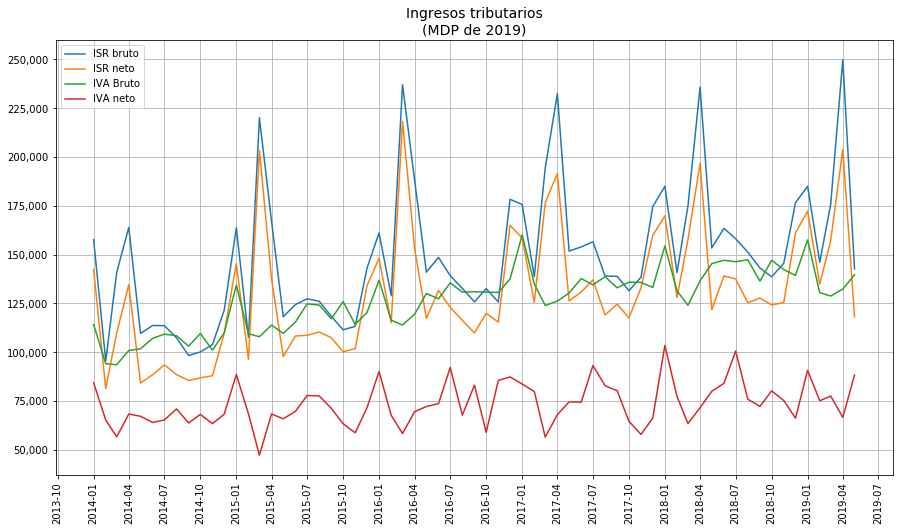

In [10]:
descriptive.plot_series(ingresos_sat,
                        ['isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r', 'iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r'],
                        legend= ['ISR bruto', 'ISR neto', 'IVA Bruto', 'IVA neto'],
                        title='Ingresos tributarios', subtitle='(MDP de 2019)',ticks='quarterly')

In [11]:
descriptive.cross_tab(ingresos_sat, ['isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r', 'iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r'],
                      [2018, 2019], False)

Se ve estacionalidad de ingresos tributarios. Abril fue el mes con mayores ingresos brutos desde 2017. En 2015 y 2016 el mes de mayor recaudación bruta fue Marzo.

### Análisis de compensaciones y devoluciones en MDP de 2019

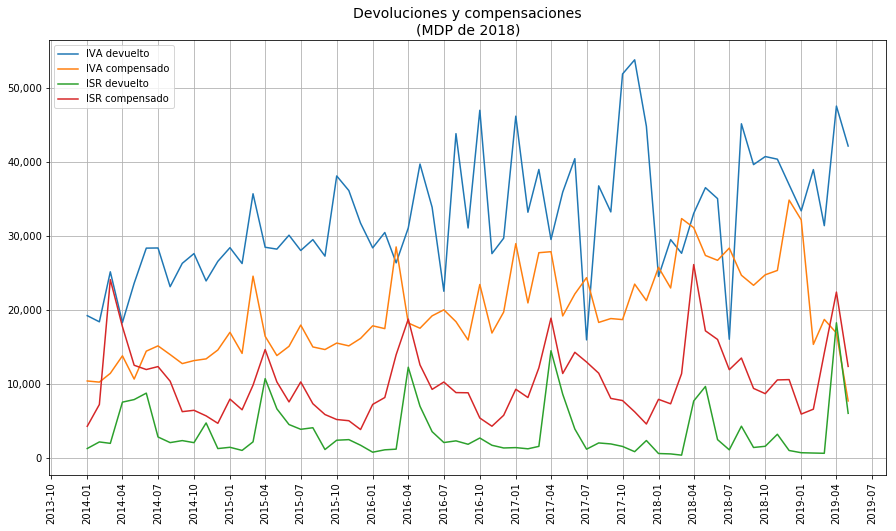

In [12]:
descriptive.plot_series(ingresos_sat,
                        ['iva_dev_(mdp)_r', 'iva_comp_(mdp)_r', 'isr_dev_(mdp)_r', 'isr_comp_(mdp)_r'],
                         legend= ['IVA devuelto', 'IVA compensado', 'ISR devuelto', 'ISR compensado'],
                        title='Devoluciones y compensaciones', subtitle='(MDP de 2018)',ticks='quarterly')

In [13]:
descriptive.cross_tab(ingresos_sat, ['iva_dev_(mdp)_r', 'iva_comp_(mdp)_r', 'isr_dev_(mdp)_r', 'isr_comp_(mdp)_r'],
                      [2018, 2019], False)

Se ve comportamiento a la baja en compensaciones del IVA, cerrando Mayo de 2019 en 7,440 MDP, muy por debajo de la cifra de 2018 de alrededor de 26,484. Devoluciones de IVA, por su parte, incrementan. El valor para Mayo de 2019 es de 40,810 MDP, por encima del valor para mayo del 2018 de 35,359 MDP. En resumen, se observa una disminución en compoensaciones de 19,040 MDP y un incremento en devoluciones de 5,451 MDP, resultando en una reducción neta de 13,589 en los gastos del estado.

## Análisis de compensaciones y devoluciones en % del ingresos brutos.

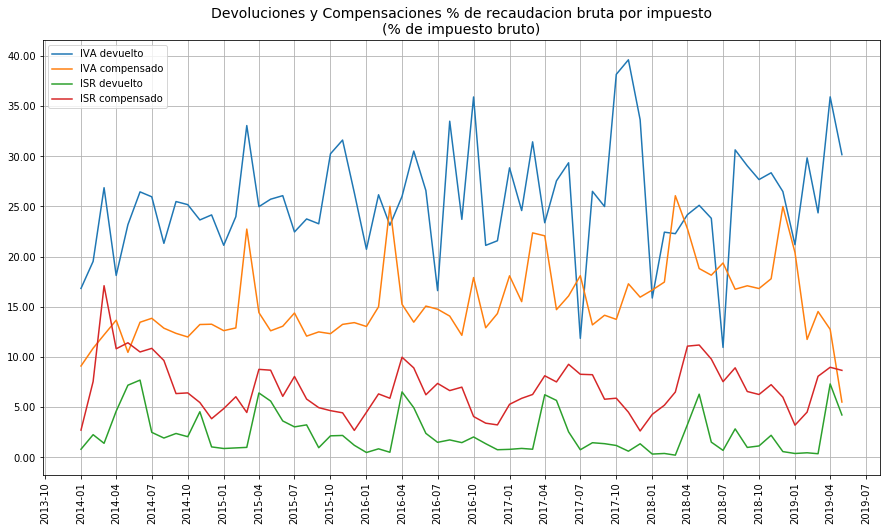

In [14]:
descriptive.plot_series(ingresos_sat,
                        ['iva_dev_%bruto', 'iva_comp_%bruto',\
                         'isr_dev_%bruto', 'isr_comp_%bruto'],
                         legend= ['IVA devuelto', 'IVA compensado', 'ISR devuelto', 'ISR compensado'],
                         title='Devoluciones y Compensaciones % de recaudacion bruta por impuesto',
                         subtitle='(% de impuesto bruto)',ticks='quarterly')

In [15]:
descriptive.cross_tab(ingresos_sat, ['iva_dev_%bruto', 'isr_comp_%bruto'],
                      years=[2018, 2019], ratios=True,
                      cols_for_tot=[['iva_dev_(mdp)_r','iva_bruto_(mdp)_r'],
                                    ['isr_comp_(mdp)_r','isr_bruto_(mdp)_r']],
                      for_plot=False, absolute_change=True)

Se ve efecto similar al observado en valores reales. Compensaciones de IVA en Mayo de 2019 representan alrededor de 5.4% del IVA bruto, por debajo del 18.8% del mismo periodo en 2018. Devoluciones del IVA incrementan de 25.1% a 30.15%. Se refuerza percepción de que suspensión de compensaciones tuvo efecto positivo para la recaudación.

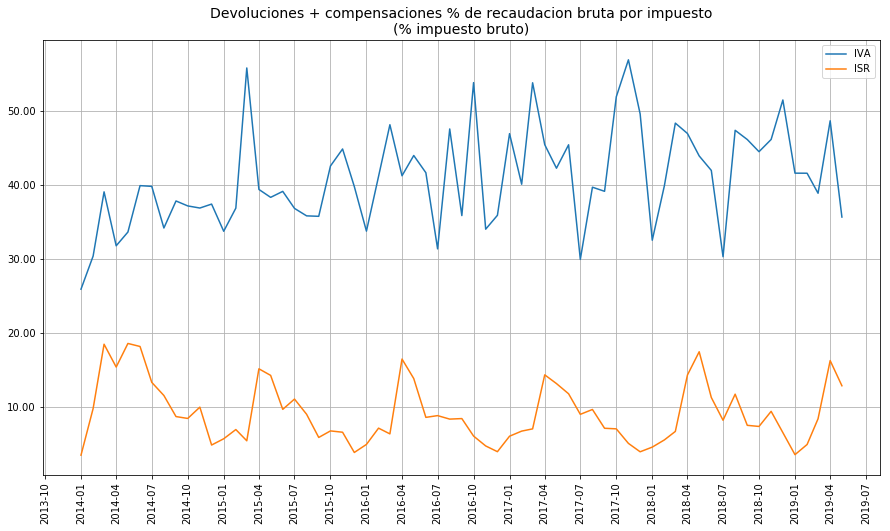

In [16]:
descriptive.plot_series(ingresos_sat,
                        ['iva_dev_comp_%bruto', 'isr_dev_comp_%bruto'],
                        legend= ['IVA', 'ISR'],
                        title='Devoluciones + compensaciones % de recaudacion bruta por impuesto',
                        subtitle='(% impuesto bruto)',ticks='quarterly')

In [17]:
descriptive.cross_tab(ingresos_sat, ['iva_dev_comp_%bruto', 'isr_dev_comp_%bruto'],
                      years=[2018, 2019], ratios=True,
                      cols_for_tot=[['iva_dev_comp_(mdp)_r','iva_bruto_(mdp)_r'],
                                    ['isr_dev_comp_(mdp)_r','isr_bruto_(mdp)_r']],
                      for_plot=False, absolute_change=True)

Devoluciones y compensaciones como porcentaje de los ingresos brutos por impuesto disminuyeron de 44 a 36% para el IVA y de 17 a 13% para el ISR comparando Mayo 2018 con Mayo 2019.

# Infiriendo PIB

### pib_r_2018_1: Solo calculando valor para Abril 2018 con crecimiento IGAE

In [18]:
pib_r_2019 = pib_r_df['pibr_2019']

In [19]:
pib_r_2019_sa = pib_r_sa_df['pibr_2019_sa']

### Calculando cambios porcentuales

In [92]:
download.load_pib_r()

,pibr_2013,pibr_2019
fecha,,
1989-01-01,8.575114e+06,1.056744e+07
1989-02-01,8.575114e+06,1.056744e+07
1989-03-01,8.575114e+06,1.056744e+07
1989-04-01,8.912466e+06,1.098317e+07
1989-05-01,8.912466e+06,1.098317e+07
1989-06-01,8.912466e+06,1.098317e+07
1989-07-01,8.452557e+06,1.041640e+07
1989-08-01,8.452557e+06,1.041640e+07
1989-09-01,8.452557e+06,1.041640e+07


### Serie original

In [79]:
inpc = download.load_inpc()

In [91]:
inpc

,inpc
fecha,
1990-01-01,7.532511
1990-02-01,7.703079
1990-03-01,7.838879
1990-04-01,7.958183
1990-05-01,8.097060
1990-06-01,8.275395
1990-07-01,8.426312
1990-08-01,8.569886
1990-09-01,8.692047


In [93]:
igae

,igae
fecha,
1993-01-01,60.407691
1993-02-01,61.022521
1993-03-01,63.943249
1993-04-01,61.865984
1993-05-01,63.612900
1993-06-01,62.882587
1993-07-01,62.797953
1993-08-01,62.027886
1993-09-01,62.018337


In [94]:
igae_pct_change = igae.pct_change(12)
pib_r_pct_change = pib_r_2019.loc[pib_r_2019.notna()].pct_change(12)

In [59]:
igae_pct_change.tail()

,igae
fecha,
2018-12-01,0.000241
2019-01-01,0.011959
2019-02-01,0.010638
2019-03-01,0.012942
2019-04-01,-0.014146


In [98]:
pib_r_pct_change.tail()

fecha
2018-11-01    0.016890
2018-12-01    0.016890
2019-01-01    0.012463
2019-02-01    0.012463
2019-03-01    0.012463
Freq: MS, Name: pibr_2019, dtype: float64

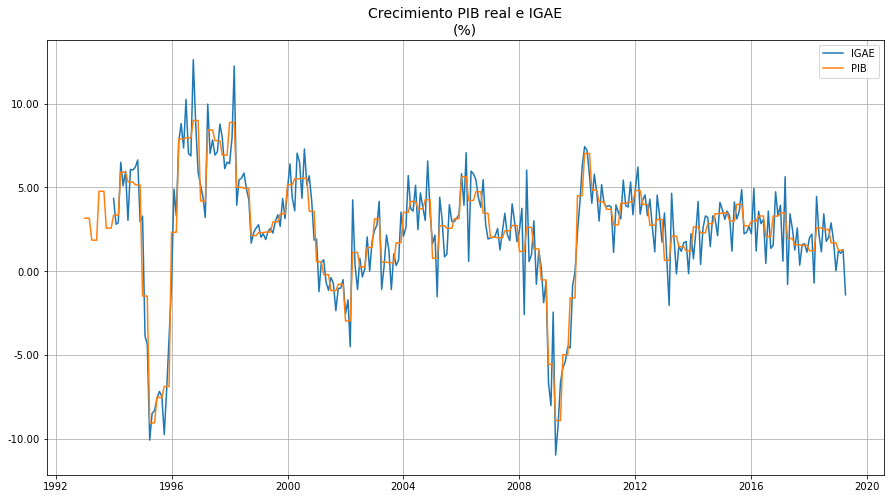

In [21]:
igae_pct_change_plot = igae_pct_change * 100
igae_pct_change_plot = igae_pct_change_plot.merge(pib_r_pct_change * 100, left_index=True, right_index=True, how='left')
descriptive.plot_series(igae_pct_change_plot, title='Crecimiento PIB real e IGAE',
                        subtitle='(%)', legend=['IGAE', 'PIB'])

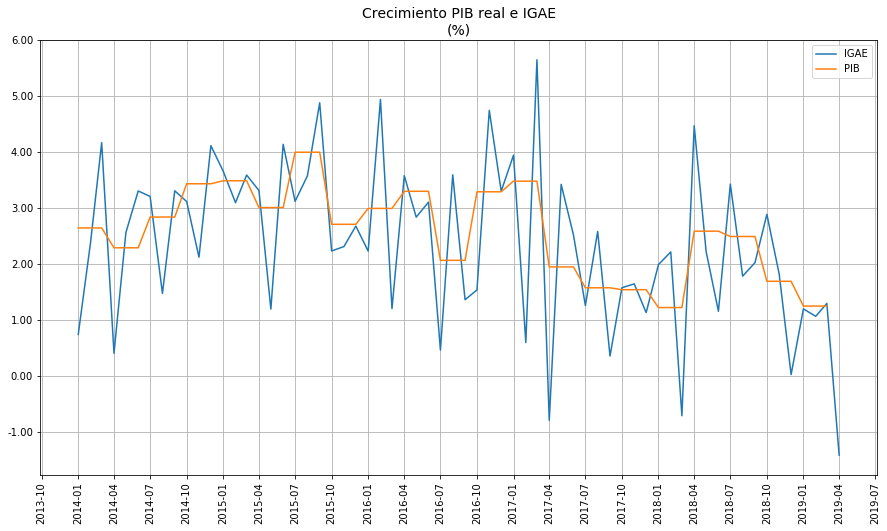

In [22]:
descriptive.plot_series(igae_pct_change_plot, title='Crecimiento PIB real e IGAE',
                        subtitle='(%)', legend=['IGAE', 'PIB'], 
                        min_date = '2014-01-01',
                        ticks='quarterly')

In [101]:
last_growth_igae

igae   -0.014146
Name: 2019-04-01 00:00:00, dtype: float64

In [103]:
last_growth_igae = igae_pct_change.loc['2019-04-01']
pib_r_2019_df = pib_r_2019.loc[pib_r_2019.index >= '2014-01-01'].to_frame()
pib_r_2019_df['pib_r_2019_1'] = pib_r_2019_df['pibr_2019']
pib_r_2019_df = pib_r_2019_df.reindex(pd.date_range('2014-01-01', '2019-05-01', freq='MS'))
pib_r_2019_df.loc[pd.date_range('2019-04-01', '2019-05-01', freq='MS'), 'pib_r_2019_1'] = \
    float(pib_r_2019_df.loc['2018-04-01', 'pib_r_2019_1'] * (1 + last_growth_igae))
pib_r_2019_df

,pibr_2019,pib_r_2019_1
2014-01-01,1.988438e+07,1.988438e+07
2014-02-01,1.988438e+07,1.988438e+07
2014-03-01,1.988438e+07,1.988438e+07
2014-04-01,2.062548e+07,2.062548e+07
2014-05-01,2.062548e+07,2.062548e+07
2014-06-01,2.062548e+07,2.062548e+07
2014-07-01,2.051233e+07,2.051233e+07
2014-08-01,2.051233e+07,2.051233e+07
2014-09-01,2.051233e+07,2.051233e+07
2014-10-01,2.146387e+07,2.146387e+07


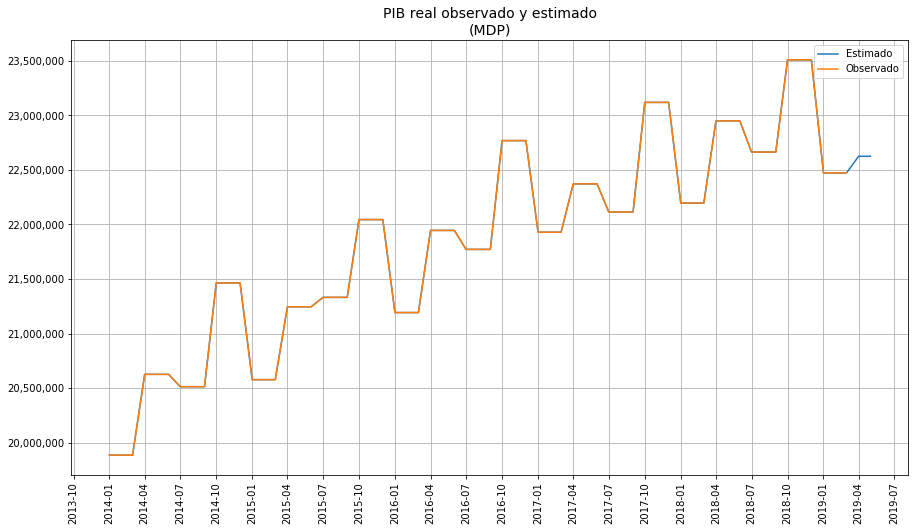

In [104]:
descriptive.plot_series(pib_r_2019_df, ['pib_r_2019_1', 'pibr_2019'], title='PIB real observado y estimado',
                        subtitle='(MDP)', legend=['Estimado', 'Observado'], ticks='quarterly')

In [65]:
display(pib_r_2019_df['pib_r_2019_1'].pct_change().tail())
display(pib_r_2019_df['pib_r_2019_1'].pct_change(12).tail())

2019-01-01   -0.044105
2019-02-01    0.000000
2019-03-01    0.000000
2019-04-01    0.021086
2019-05-01    0.000000
Freq: MS, Name: pib_r_2019_1, dtype: float64

2019-01-01    0.012463
2019-02-01    0.012463
2019-03-01    0.012463
2019-04-01   -0.000141
2019-05-01   -0.000141
Freq: MS, Name: pib_r_2019_1, dtype: float64

### Serie desestacionalizada

In [66]:
igae_sa_pct_change = igae_sa.pct_change(12)
pib_r_sa_pct_change = pib_r_2019_sa.loc[pib_r_2019_sa.notna()].pct_change(12)

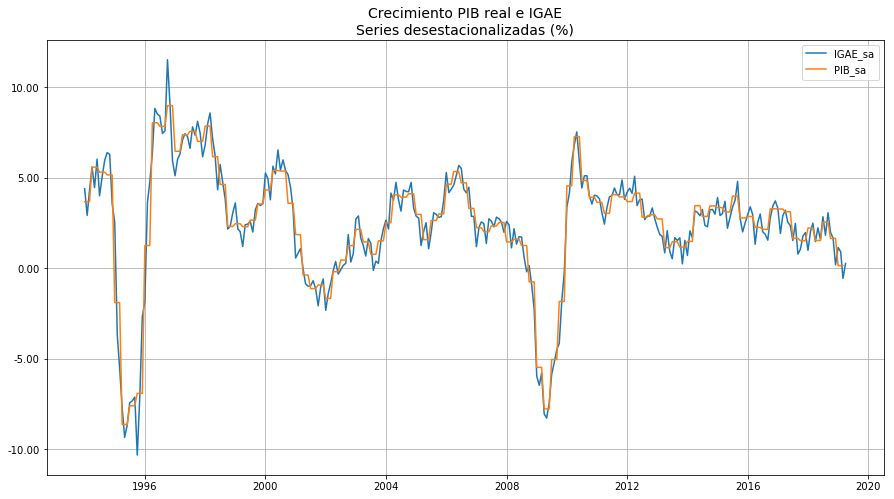

In [67]:
igae_sa_pct_change_plot = igae_sa_pct_change * 100
igae_sa_pct_change_plot = igae_sa_pct_change_plot.merge(
    pib_r_sa_pct_change * 100, left_index=True, right_index=True, how='left')
descriptive.plot_series(igae_sa_pct_change_plot, title='Crecimiento PIB real e IGAE',
                        subtitle='Series desestacionalizadas (%)', legend=['IGAE_sa', 'PIB_sa'])

In [113]:
igae_sa_pct_change.loc[igae_pct_change.index >= '2016-01-01'].describe()

,igae_sa
count,40.000000
mean,0.020364
std,0.009756
min,-0.005618
25%,0.015151
50%,0.019969
75%,0.028541
max,0.037210


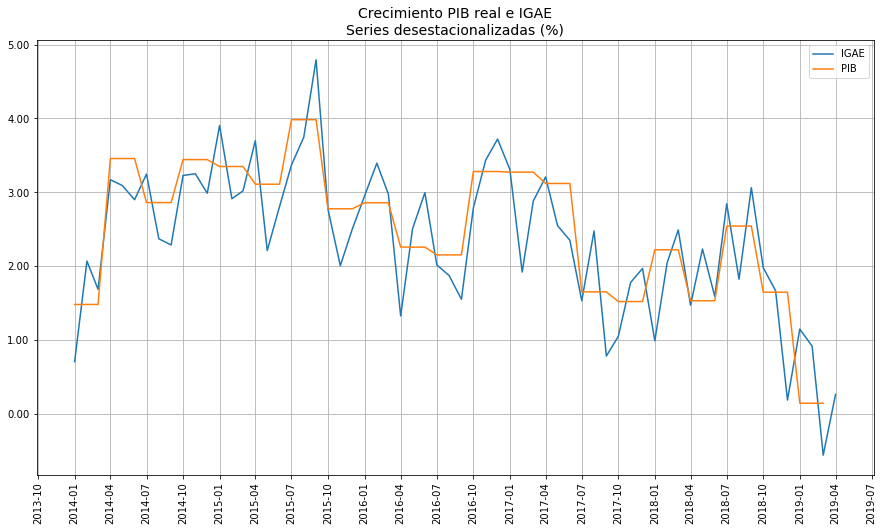

In [27]:
descriptive.plot_series(igae_sa_pct_change_plot, title='Crecimiento PIB real e IGAE',
                        subtitle='Series desestacionalizadas (%)', legend=['IGAE', 'PIB'], 
                        min_date = '2014-01-01',
                        ticks='quarterly')

### 1. Imputando PIB 2019-04 y 2019-05 para serie desestacionalizada

Usando el último crecimiento porcentual anual del IGAE para imputar el valor del PIB para el siguiente trimestre

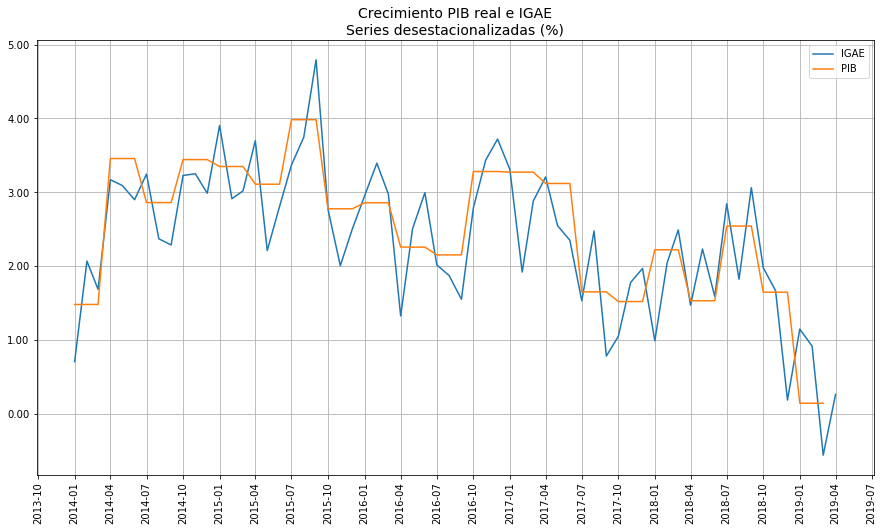

In [28]:
descriptive.plot_series(igae_sa_pct_change_plot, title='Crecimiento PIB real e IGAE',
                        subtitle='Series desestacionalizadas (%)', legend=['IGAE', 'PIB'], 
                        min_date = '2014-01-01',
                        ticks='quarterly')

In [29]:
last_growth_igae_sa = igae_sa_pct_change.loc['2019-04-01']
pib_r_2019_sa_df = pib_r_2019_sa.loc[pib_r_2019_sa.index >= '2014-01-01'].to_frame()
pib_r_2019_sa_df['pib_r_2019_sa_1'] = pib_r_2019_sa_df['pibr_2019_sa']
pib_r_2019_sa_df = pib_r_2019_sa_df.reindex(pd.date_range('2014-01-01', '2019-05-01', freq='MS'))
pib_r_2019_sa_df.loc[pd.date_range('2019-04-01', '2019-05-01', freq='MS'), 'pib_r_2019_sa_1'] = \
    float(pib_r_2019_sa_df.loc['2018-04-01', 'pib_r_2019_sa_1'] * (1 + last_growth_igae_sa/100))

In [30]:
pib_r_2019_sa_df

,pibr_2019_sa,pib_r_2019_sa_1
2014-01-01,2.034448e+07,2.034448e+07
2014-02-01,2.034448e+07,2.034448e+07
2014-03-01,2.034448e+07,2.034448e+07
2014-04-01,2.060276e+07,2.060276e+07
2014-05-01,2.060276e+07,2.060276e+07
2014-06-01,2.060276e+07,2.060276e+07
2014-07-01,2.067860e+07,2.067860e+07
2014-08-01,2.067860e+07,2.067860e+07
2014-09-01,2.067860e+07,2.067860e+07
2014-10-01,2.090905e+07,2.090905e+07


In [31]:
crec_primer_trimestre = \
    pib_r_2019_sa_df.loc[pib_r_2019_sa_df.index >= '2018-12-01', 'pibr_2019_sa'].pct_change().loc['2019-01-01']

In [32]:
crecimiento_shcp = (1 + params['SHCP_crecimiento_pib'] / 100) / (1 + crec_primer_trimestre)
crecimiento_shcp = crecimiento_shcp ** (1/3)
crecimiento_shcp = crecimiento_shcp - 1

In [33]:
crecimiento_banxico = (1 + params['BANXICO_crecimiento_pib'] / 100) / (1 + crec_primer_trimestre)
crecimiento_banxico = crecimiento_banxico ** (1/3)
crecimiento_banxico = crecimiento_banxico - 1

In [34]:
display(pib_r_2019_sa_df['pib_r_2019_sa_1'].pct_change().tail(2))
display(crecimiento_shcp)
crecimiento_banxico

2019-04-01   -0.005215
2019-05-01    0.000000
Freq: MS, Name: pib_r_2019_sa_1, dtype: float64

0.005888556695716973

0.005228091268338009

In [35]:
pib_r_2019_sa_df['pib_r_2019_sa_2'] = pib_r_2019_sa_df['pibr_2019_sa']
pib_r_2019_sa_df.loc[pd.date_range('2019-04-01', '2019-05-01', freq='MS'), 'pib_r_2019_sa_2'] = \
    float(pib_r_2019_sa_df.loc['2019-03-01', 'pibr_2019_sa'] * (1 + float(crecimiento_shcp)))

In [36]:
pib_r_2019_sa_df['pib_r_2019_sa_3'] = pib_r_2019_sa_df['pibr_2019_sa']
pib_r_2019_sa_df.loc[pd.date_range('2019-04-01', '2019-05-01', freq='MS'), 'pib_r_2019_sa_3'] = \
    float(pib_r_2019_sa_df.loc['2019-03-01', 'pibr_2019_sa'] * (1 + float(crecimiento_banxico)))

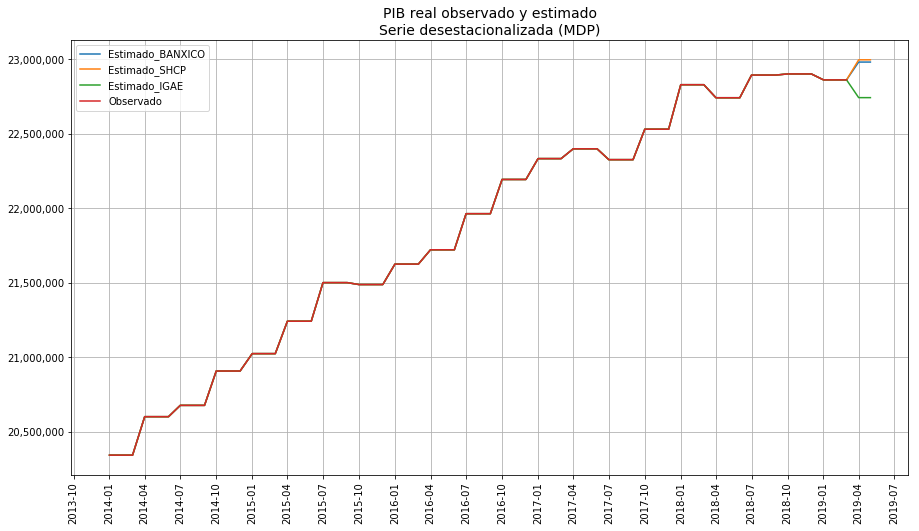

In [37]:
descriptive.plot_series(pib_r_2019_sa_df, 
                        ['pib_r_2019_sa_3', 'pib_r_2019_sa_2', 'pib_r_2019_sa_1', 'pibr_2019_sa'], 
                        title='PIB real observado y estimado',
                        subtitle='Serie desestacionalizada (MDP)',
                        legend=['Estimado_BANXICO', 'Estimado_SHCP', 'Estimado_IGAE', 'Observado'], ticks='quarterly')

# Eficiencia mensual

## Serie Original

### Limitaciones de clacular eficiencia con datos constantes de PIB

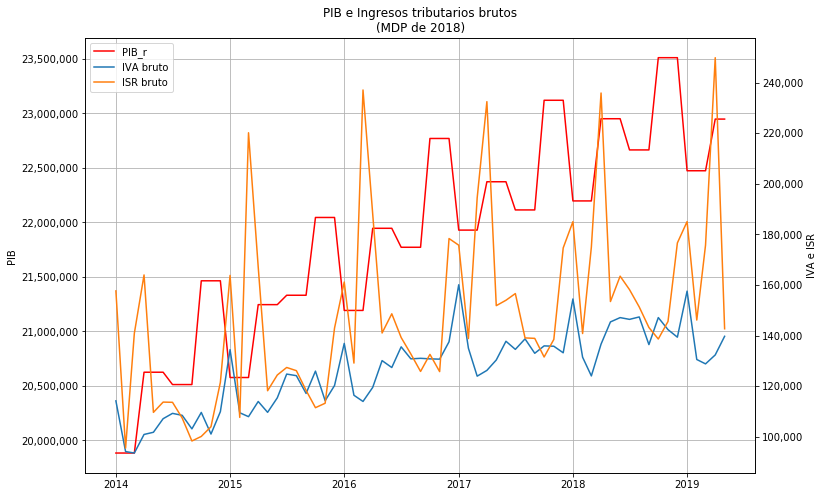

In [38]:
import matplotlib as mpl

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.plot(pib_r_2019_df['pib_r_2019_1'], color='r', label='PIB_r')
ax1.plot(np.array(np.nan), label ='IVA bruto')
ax1.plot(np.array(np.nan), label ='ISR bruto')
ax1.legend()
ax1.set_ylabel('PIB')
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2 = ax1.twinx()
ax2.plot(ingresos_sat[['iva_bruto_(mdp)_r', 'isr_bruto_(mdp)_r']])
ax2.set_ylabel('IVA e ISR')
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_title('PIB e Ingresos tributarios brutos\n(MDP de 2018)')
ax1.grid()
plt.show()
# to_plot = to_plot.merge(ingresos_sat, left_index=True, right_index=True)
# descriptive.plot_series(to_plot, ['pib_r_2018_1','iva_bruto_(mdp)_r', 'isr_bruto_(mdp)_r'])

### Calculando valores porcentuales

In [39]:
impuestos_interes = (
['iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r', 'iva_dev_(mdp)_r', 'iva_comp_(mdp)_r',\
 'iva_reg_(mdp)_r',
 'isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r', 'isr_dev_(mdp)_r', 'isr_comp_(mdp)_r', 
 'isr_reg_(mdp)_r'])
for tax in impuestos_interes:
    colname = tax.replace('_(mdp)_r', '_%PIB')
    ingresos_sat[colname] = (ingresos_sat[tax] / pib_r_2019_df['pib_r_2019_1']) * 100

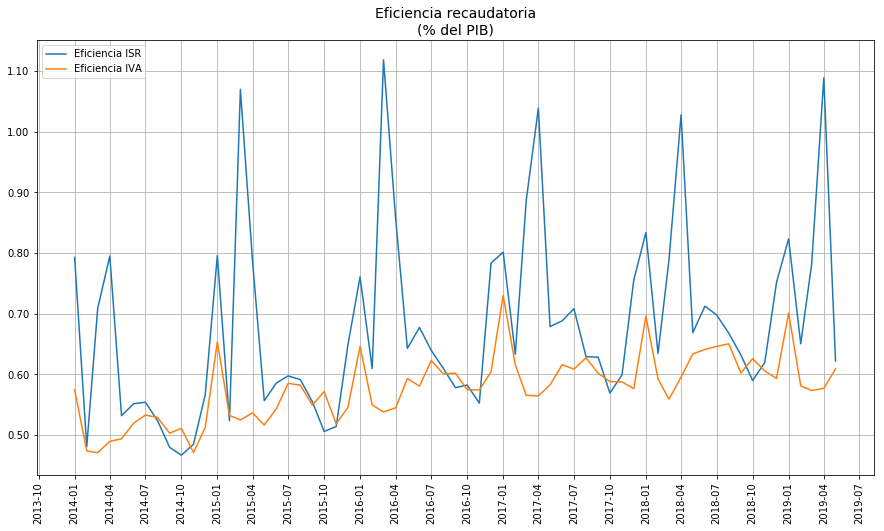

In [40]:
descriptive.plot_series(ingresos_sat, ['isr_bruto_%PIB','iva_bruto_%PIB'], title='Eficiencia recaudatoria',
                        subtitle='(% del PIB)', legend=['Eficiencia ISR', 'Eficiencia IVA'], ticks='quarterly')

In [41]:
ingresos_sat[['isr_bruto_%PIB','iva_bruto_%PIB']].describe()

,isr_bruto_%PIB,iva_bruto_%PIB
count,65.000000,65.000000
mean,0.681119,0.576960
std,0.152495,0.054266
min,0.466490,0.470551
25%,0.577868,0.537703
50%,0.639394,0.580361
75%,0.781945,0.605440
max,1.118575,0.729926


## Comparativo mensual últimos 3 años

In [105]:
eficienciencia_isr_comp = descriptive.cross_tab(ingresos_sat, ['isr_bruto_%PIB'], range(2014, 2020),
                                                for_plot = True, notna=False)

In [43]:
display(eficienciencia_isr_comp)

mes_n,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
anio,,,,,,,,,,,,
2014,0.792780,0.480347,0.708512,0.794881,0.531575,0.551236,0.553879,0.523533,0.479362,0.466490,0.484351,0.566030
2015,0.795892,0.523175,1.069851,0.786490,0.556307,0.585563,0.597165,0.591217,0.554738,0.505734,0.513724,0.648550
2016,0.760435,0.609250,1.118575,0.856876,0.642523,0.677113,0.639394,0.609535,0.577868,0.582182,0.552244,0.783262
2017,0.801268,0.632964,0.886666,1.038947,0.678569,0.688110,0.708105,0.628846,0.628053,0.568880,0.598925,0.755363
2018,0.833472,0.634318,0.788124,1.027672,0.668561,0.712268,0.697742,0.667626,0.631755,0.589660,0.619131,0.751172
2019,0.823330,0.650203,0.781945,1.088652,0.621748,NaN,NaN,NaN,NaN,NaN,NaN,NaN


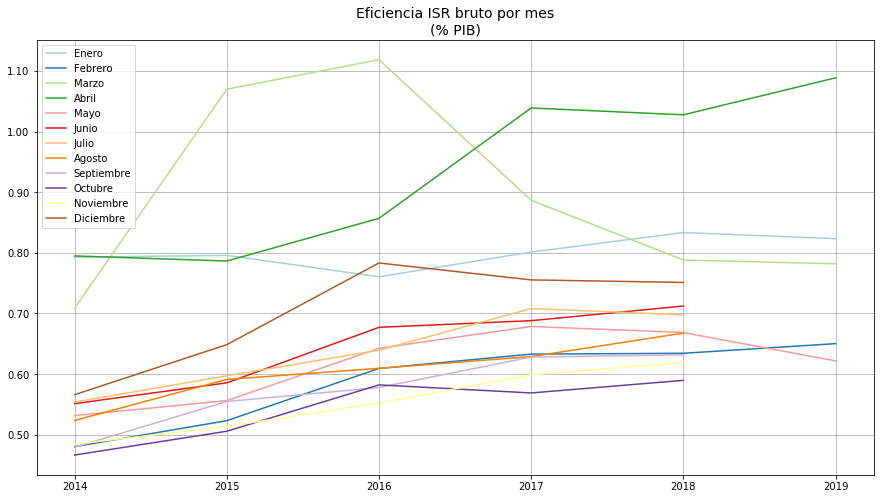

In [106]:
descriptive.plot_series(eficienciencia_isr_comp, title='Eficiencia ISR bruto por mes', subtitle='(% PIB)')

# Elasticidad mensual del IVA

In [45]:
iva_elast_mes = ingresos_sat['iva_neto_(mdp)_r'].pct_change(12) / pib_r_pct_change

In [46]:
iva_elast_mes.describe()

count    51.000000
mean      2.063082
std       7.532989
min     -20.999337
25%      -2.094952
50%       1.424180
75%       5.094246
max      19.347963
dtype: float64

# Ingresos Tributarios desestacionalizados

Desestacionalizando series

In [47]:
to_sa = ['iva_neto_(mdp)_r', 'isr_neto_(mdp)_r', 'iva_bruto_(mdp)_r', 'isr_bruto_(mdp)_r']
for var in to_sa:
    ingresos_sat[var + '_sa'] = descriptive.seasonally_adjust(ingresos_sat[var])

R[write to console]: Model used in SEATS is different: (0 0 0)(0 1 0)

R[write to console]: Model used in SEATS is different: (0 0 0)(0 1 0)



Gráficas

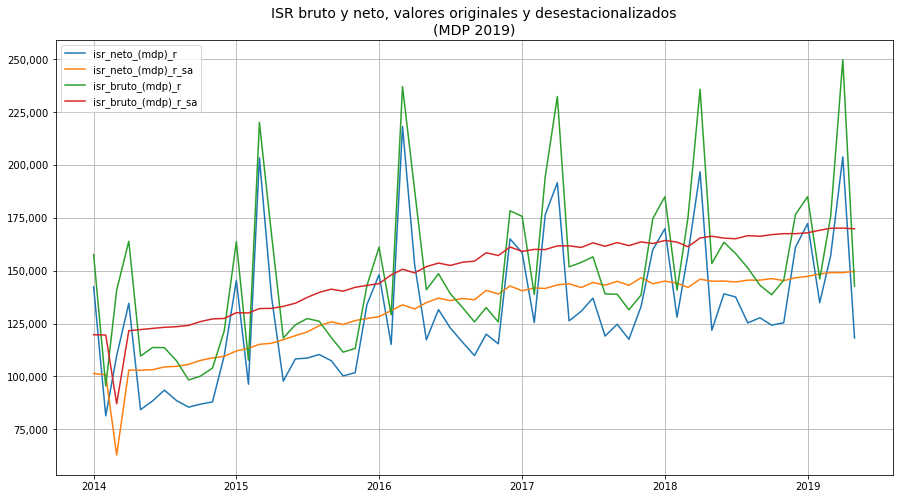

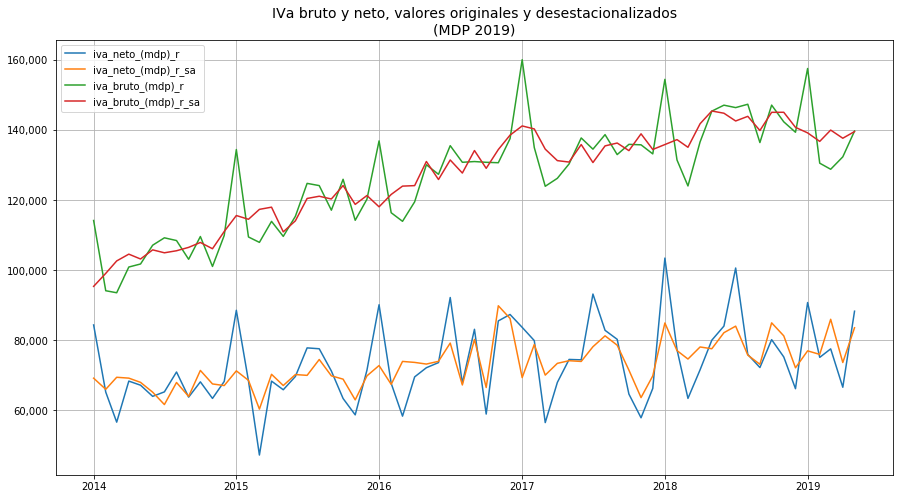

In [48]:
to_plot_isr =  ['isr_neto_(mdp)_r', 'isr_neto_(mdp)_r_sa', 'isr_bruto_(mdp)_r',  'isr_bruto_(mdp)_r_sa']
to_plot_iva = ['iva_neto_(mdp)_r', 'iva_neto_(mdp)_r_sa', 'iva_bruto_(mdp)_r',  'iva_bruto_(mdp)_r_sa']
descriptive.plot_series(ingresos_sat, to_plot_isr, title='ISR bruto y neto, valores originales y desestacionalizados',
                        subtitle='(MDP 2019)')
descriptive.plot_series(ingresos_sat, to_plot_iva, title='IVa bruto y neto, valores originales y desestacionalizados',
                        subtitle='(MDP 2019)')

### Calculando valores porcentuales

In [49]:
impuestos_interes = (
['iva_bruto_(mdp)_r_sa', 'iva_neto_(mdp)_r_sa',
 'isr_bruto_(mdp)_r_sa', 'isr_neto_(mdp)_r_sa'])
for tax in impuestos_interes:
    for i in range(1, 4):
        colname = tax.replace('_(mdp)_r', '_%PIB_{}'.format(i))
        ingresos_sat[colname] = (ingresos_sat[tax] / pib_r_2019_sa_df['pib_r_2019_sa_{}'.format(i)]) * 100
        ingresos_sat[colname] = (ingresos_sat[tax] / pib_r_2019_sa_df['pib_r_2019_sa_{}'.format(i)]) * 100

In [50]:
[col + '_bruto_%PIB_{}_sa'.format(i) for i in range(1, 4) for col in ['isr', 'iva']]

['isr_bruto_%PIB_1_sa',
 'iva_bruto_%PIB_1_sa',
 'isr_bruto_%PIB_2_sa',
 'iva_bruto_%PIB_2_sa',
 'isr_bruto_%PIB_3_sa',
 'iva_bruto_%PIB_3_sa']

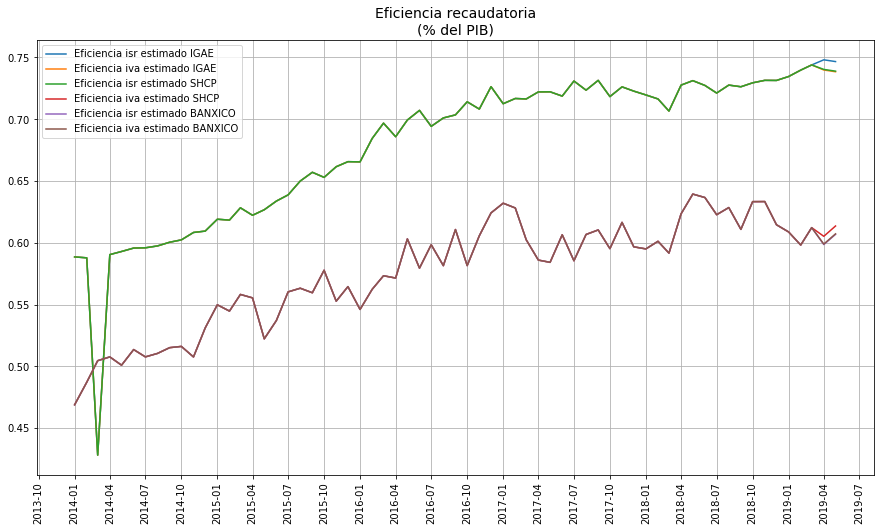

In [51]:
descriptive.plot_series(ingresos_sat, 
                        [col + '_bruto_%PIB_{}_sa'.format(i) for col in ['isr', 'iva'] for i in range(1, 4)],
                        title='Eficiencia recaudatoria',
                        subtitle='(% del PIB)',
                        legend=['Eficiencia {} estimado '.format(tax) + col for col in ['IGAE', 'SHCP', 'BANXICO']
                                for tax in ['isr', 'iva']],
                        ticks='quarterly')

In [52]:
eficienciencia_isr_comp = descriptive.cross_tab(ingresos_sat, ['isr_bruto_%PIB'], range(2014, 2020),
                                                for_plot = True, notna=False)

In [53]:
display(eficienciencia_isr_comp)

mes_n,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
anio,,,,,,,,,,,,
2014,0.792780,0.480347,0.708512,0.794881,0.531575,0.551236,0.553879,0.523533,0.479362,0.466490,0.484351,0.566030
2015,0.795892,0.523175,1.069851,0.786490,0.556307,0.585563,0.597165,0.591217,0.554738,0.505734,0.513724,0.648550
2016,0.760435,0.609250,1.118575,0.856876,0.642523,0.677113,0.639394,0.609535,0.577868,0.582182,0.552244,0.783262
2017,0.801268,0.632964,0.886666,1.038947,0.678569,0.688110,0.708105,0.628846,0.628053,0.568880,0.598925,0.755363
2018,0.833472,0.634318,0.788124,1.027672,0.668561,0.712268,0.697742,0.667626,0.631755,0.589660,0.619131,0.751172
2019,0.823330,0.650203,0.781945,1.088652,0.621748,NaN,NaN,NaN,NaN,NaN,NaN,NaN


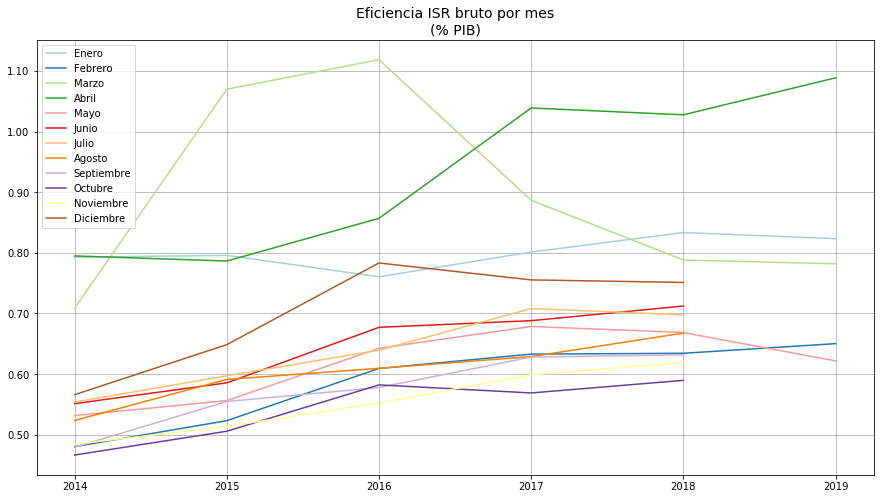

In [54]:
descriptive.plot_series(eficienciencia_isr_comp, title='Eficiencia ISR bruto por mes', subtitle='(% PIB)')

# Eficiencia trimestral

In [55]:
pib_r_2018_trim = pib_r_2019.resample('3MS').mean()
ingresos_sat_trim = ingresos_sat.resample('3MS').sum()
## Simulando Junio
ingresos_sat_trim.loc['2019-04-01'] = ingresos_sat_trim.loc['2019-04-01'] * 1.5

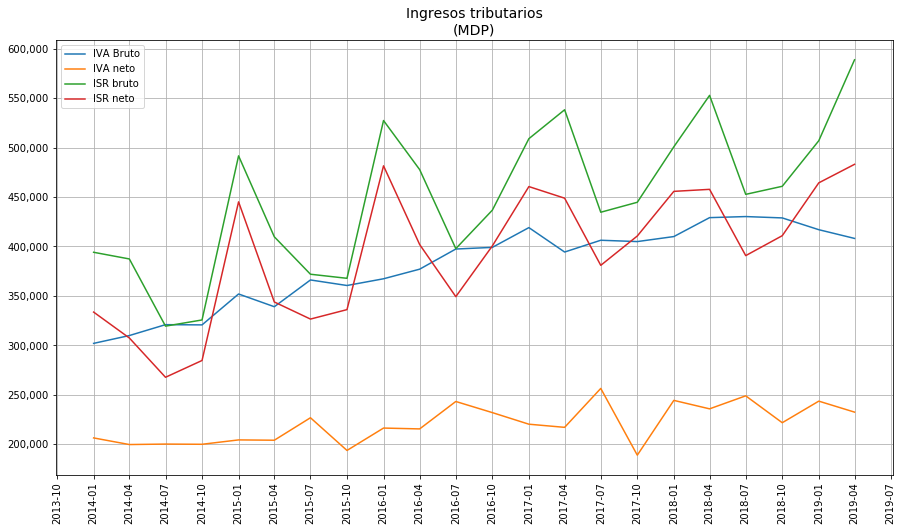

In [56]:
descriptive.plot_series(ingresos_sat_trim,
                        ['iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r','isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r'],
                        legend= ['IVA Bruto', 'IVA neto','ISR bruto', 'ISR neto'],
                        title='Ingresos tributarios', subtitle='(MDP)',ticks='quarterly')

### Hay que recalcular porcentajes del PIB

In [57]:
impuestos_interes = (
['iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r', 'iva_dev_(mdp)_r', 'iva_comp_(mdp)_r',\
 'iva_reg_(mdp)_r',
 'isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r', 'isr_dev_(mdp)_r', 'isr_comp_(mdp)_r', 
 'isr_reg_(mdp)_r'])
for tax in impuestos_interes:
    colname = tax.replace('_(mdp)_r', '_%PIB')
    ingresos_sat_trim[colname] = (ingresos_sat_trim[tax] / pib_r_2018_df['pib_r_2018_1']) * 100

NameError: name 'pib_r_2018_df' is not defined

In [ ]:
descriptive.plot_series(ingresos_sat_trim, ['isr_bruto_%PIB','iva_bruto_%PIB'], title='Eficiencia recaudatoria',
                        subtitle='(% del PIB)', legend=['Eficiencia ISR', 'Eficiencia IVA'], ticks='quarterly')

In [ ]:
ingresos_sat = download.load_ingresos_fiscales_sat()

In [ ]:
iva = ingresos_sat['iva_bruto_(mdp)_r']

In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [ ]:
rstring="""
 function(timeseries){
 library(seasonal)
 ts = ts(timeseries, start=c(2014,1), end=c(2019,5), frequency=12)
 m <- seas(ts)
 final(m)
 }
"""
rfunc=robjects.r(rstring)

In [ ]:
iva_sa = rfunc(iva)

In [ ]:
iva_sa = pd.Series(iva_sa, index=iva.index)

In [ ]:
iva_sa.tail()

In [ ]:
iva.tail()

In [ ]:
descriptive.seasonally_adjust(iva).tail()

In [ ]:
fig, ax = plt.subplots()
ax.plot(iva, label='IVA')
ax.plot(iva_sa, label='IVA_sa')
ax.legend()
plt.show()

In [ ]:
iva_sa

### Ingresos tributarios desestacionalizados.
Se desestacionalizan variables usando función para desestacionalizar series usando el método X13 del Censo de USA
con la implementación en R.

Desestacionalizamos las siguientes variables: 'iva_neto_(mdp)_r', 'isr_neto_(mdp)_r', 'iva_bruto_(mdp)_r', 'isr_bruto_(mdp)_r'

El sigiente código es un loop que desestacionaliza cada una de las variables en la lista to_sa, y las incluye en el DataFrame con el apellido '_sa'

In [115]:
to_sa = ['iva_neto_(mdp)_r', 'isr_neto_(mdp)_r', 'iva_bruto_(mdp)_r', 'isr_bruto_(mdp)_r']
for var in to_sa:
    ingresos_sat[var + '_sa'] = descriptive.seasonally_adjust(ingresos_sat[var])

R[write to console]: Model used in SEATS is different: (0 0 0)(0 1 0)

R[write to console]: Model used in SEATS is different: (0 0 0)(0 1 0)



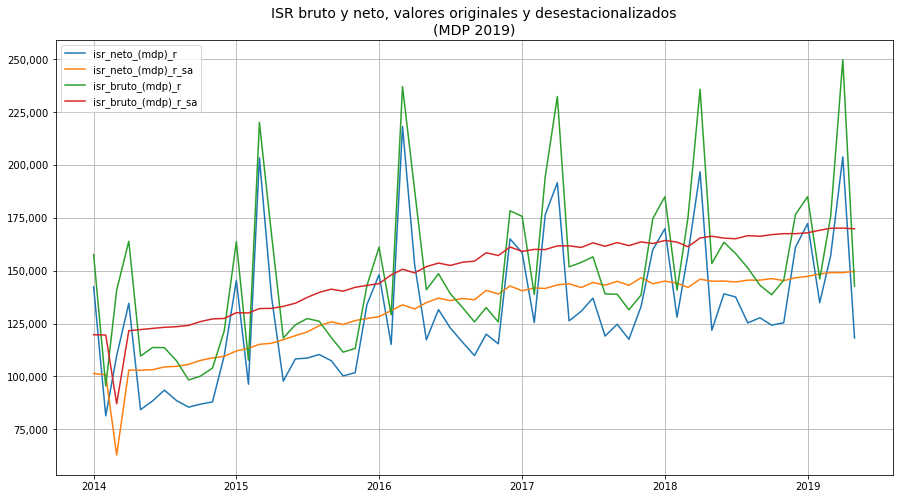

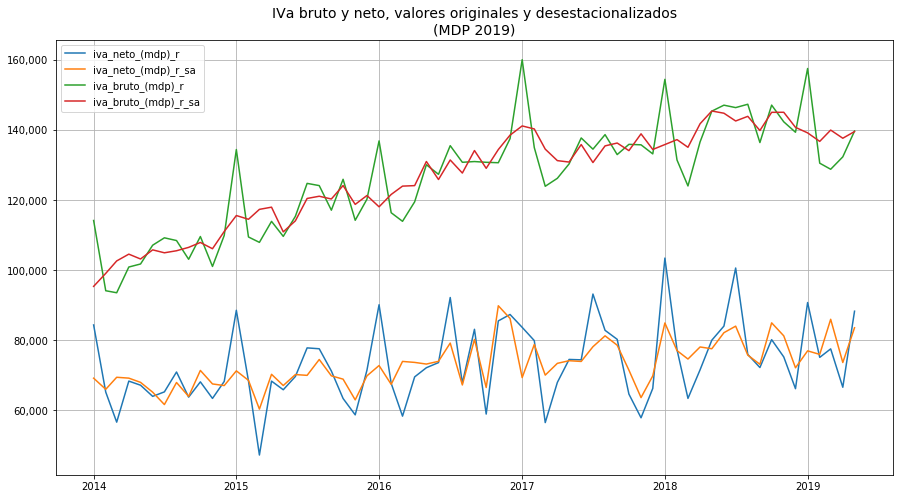

In [116]:
to_plot_isr =  ['isr_neto_(mdp)_r', 'isr_neto_(mdp)_r_sa', 'isr_bruto_(mdp)_r',  'isr_bruto_(mdp)_r_sa']
to_plot_iva = ['iva_neto_(mdp)_r', 'iva_neto_(mdp)_r_sa', 'iva_bruto_(mdp)_r',  'iva_bruto_(mdp)_r_sa']
descriptive.plot_series(ingresos_sat, to_plot_isr, title='ISR bruto y neto, valores originales y desestacionalizados',
                        subtitle='(MDP 2019)')
descriptive.plot_series(ingresos_sat, to_plot_iva, title='IVa bruto y neto, valores originales y desestacionalizados',
                        subtitle='(MDP 2019)')

In [117]:
descriptive.cross_tab(ingresos_sat,
                      ['isr_bruto_(mdp)_r_sa', 'isr_neto_(mdp)_r_sa', 'iva_bruto_(mdp)_r_sa', 'iva_neto_(mdp)_r_sa'],
                      [2018, 2019], ratios=False)